<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework_2/HW2_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

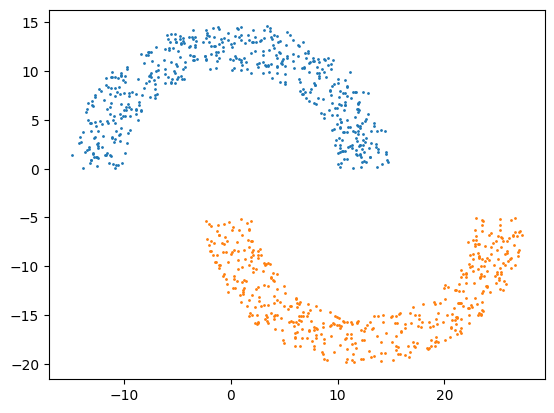

In [215]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [216]:
data_top = np.array(top)
labels_top = np.ones(data_top.shape[0])

data_bottom = np.array(bottom)
labels_bottom = -np.ones(data_bottom.shape[0])

data = np.vstack([data_top, data_bottom])
labels = np.hstack([labels_top, labels_bottom])

data = np.hstack((np.ones((data.shape[0], 1)), data))

w = np.zeros(data.shape[1])

In [222]:
def pla(data, labels, w):
    N, d = data.shape
    iterations = 0

    while True:
        idx = np.random.permutation(N)
        update_made = False

        for i in idx:
            if np.sign(np.dot(w, data[i])) != labels[i]:
                w += labels[i] * data[i]
                update_made = True
                iterations += 1

        if not update_made:
            break

    return w, iterations

w, iterations = pla(data, labels, w)
print(f"PLA converged after {iterations} iterations.")
print(w)

PLA converged after 0 iterations.
[17.          0.74009438 45.7217171 ]


In [223]:
def linear_regression(data, labels):
    x_t = np.transpose(data)
    xt_x = np.matmul(x_t, data)
    xtx_inv = np.linalg.inv(xt_x)
    xt_x_x = np.matmul(xtx_inv, x_t)
    w = np.matmul(xt_x_x, labels)

    return w

w_lr = linear_regression(data, labels)
w_lr

array([ 0.26047869, -0.00860716,  0.07912927])

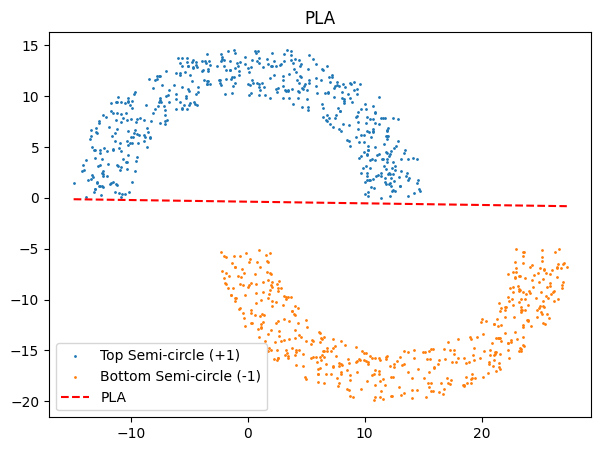

In [224]:
def plot_data_and_boundary(data, labels, w, title):
    plt.figure(figsize=(7, 5))

    plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
    plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

    x = np.linspace(min(data[:, 1]), max(data[:, 1]), 100)
    y = - (w[0] + w[1] * x) / w[2]
    plt.plot(x, y, '--', c ='red', label=title)

    plt.title(title)
    plt.legend()
    plt.show()

# LP 1 (a)
plot_data_and_boundary(data, labels, w, "PLA")

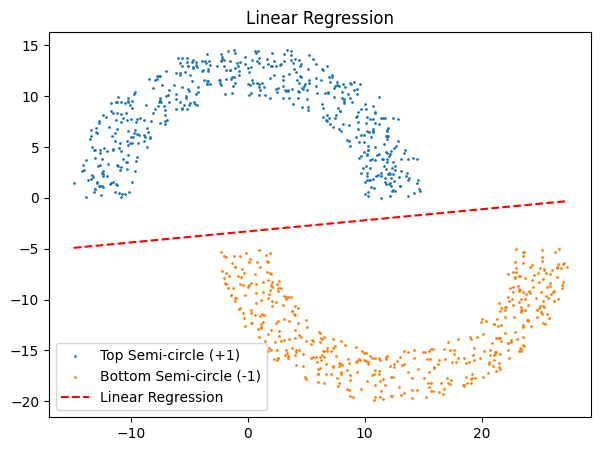

In [225]:
# LP 1 (b)
plot_data_and_boundary(data, labels, w_lr, "Linear Regression")

In [228]:
def pocket_algorithm(data, labels, w, max_iterations=100000):
    best_w = np.copy(w)
    min_errors = np.sum(np.sign(np.dot(data, w)) != labels)

    error_history = [min_errors]

    for t in range(max_iterations):
        # Pick a random data point
        i = np.random.choice(data.shape[0])
        if np.sign(np.dot(w, data[i])) != labels[i]:
            w_temp = w + labels[i] * data[i]
            current_errors = np.sum(np.sign(np.dot(data, w_temp)) != labels)
            if current_errors < min_errors:
                min_errors = current_errors
                best_w = np.copy(w_temp)
        error_history.append(min_errors)

    return best_w, error_history

w_pocket, error_history = pocket_algorithm(data, labels, w)
w_pocket

array([17.        ,  0.74009438, 45.7217171 ])

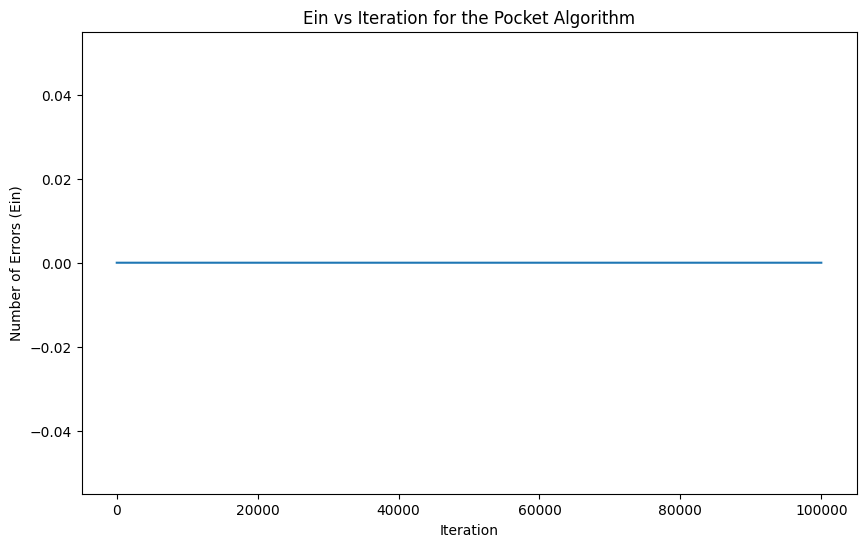

In [229]:
plt.figure(figsize=(10,6))
plt.plot(error_history)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors (Ein)')
plt.title('Ein vs Iteration for the Pocket Algorithm')
plt.show()

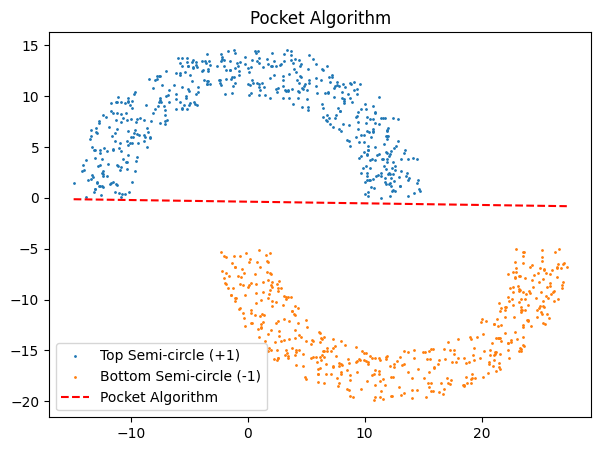

In [230]:
# LP 2 (c)
plot_data_and_boundary(data, labels, w_pocket, "Pocket Algorithm")

In [233]:
import time
# Compute E_in
def compute_error(w, X, y):
    return np.mean(np.sign(np.dot(X,w)) != y)

# Linear Regression
start_time = time.time()
w_linreg = linear_regression(data, labels)
linreg_time = time.time() - start_time
linreg_error = compute_error(w_linreg, data, labels)

start_time = time.time()
w_pocket, _ = pocket_algorithm(data, labels, w, max_iterations=100000)
pocket_time = time.time() - start_time
pocket_error = compute_error(w_pocket, data, labels)

# HP 2 (d)
print(f"Linear Regression: Time taken = {linreg_time:.5f} seconds, E_in = {linreg_error:.5f}")
print(f"Pocket Algorithm: Time taken = {pocket_time:.5f} seconds, E_in = {pocket_error:.5f}")

print("\nLinear regression typically runs faster than the Pocket algorithm especially for large iteration counts. ")
print("This is because linear regression uses a direct mathematical approach, while the Pocket algorithm involves iterative improvements over many iterations.")

Linear Regression: Time taken = 0.00038 seconds, E_in = 0.00000
Pocket Algorithm: Time taken = 1.90306 seconds, E_in = 0.00000

Linear regression typically runs faster than the Pocket algorithm especially for large iteration counts. 
This is because linear regression uses a direct mathematical approach, while the Pocket algorithm involves iterative improvements over many iterations.


In [244]:
# 1. Feature Transformation
def polynomial_transform_3rd_order(data):
    x1 = data[:, 1]
    x2 = data[:, 2]
    transformed_data = np.column_stack([
        np.ones(data.shape[0]),  # bias term
        x1, x2,                  # original features
        x1**2, x2**2, x1*x2,     # 2nd order features
        x1**3, x2**3, x1**2*x2, x1*x2**2  # 3rd order features
    ])
    return transformed_data

transformed_data = polynomial_transform_3rd_order(data)

In [247]:
weights = np.zeros(transformed_data.shape[1])
w_transform, iterations = pla(transformed_data, labels, weights)
w_pocket_transformed, error_history_transformed = pocket_algorithm(transformed_data, labels, w_transform, max_iterations=100000)
w_pocket_transformed

array([   12.        ,    59.34505892,    36.85045034,  1278.85893619,
        -154.83621847,   554.43923087,   165.31571287,  3489.65755796,
       11071.26971071, -4429.72379347])

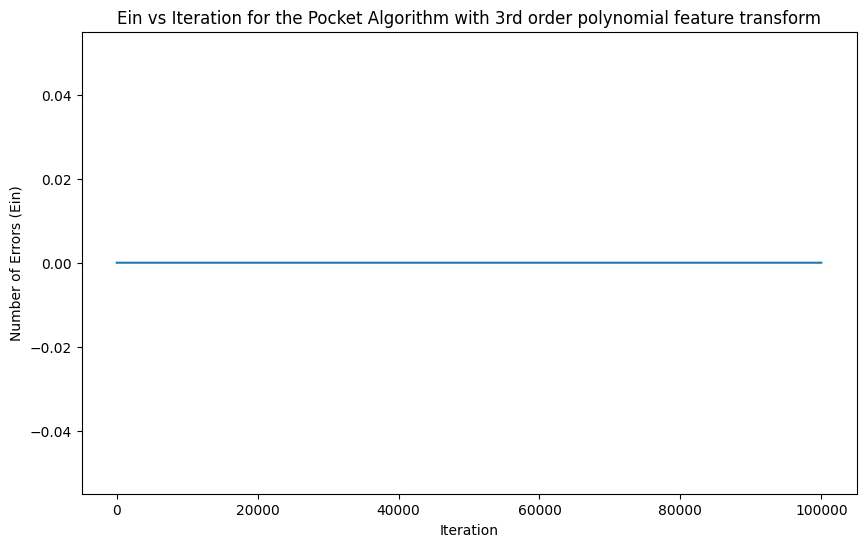

In [256]:
plt.figure(figsize=(10,6))
plt.plot(error_history_transformed)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors (Ein)')
plt.title('Ein vs Iteration for the Pocket Algorithm with 3rd order polynomial feature transform')
plt.show()

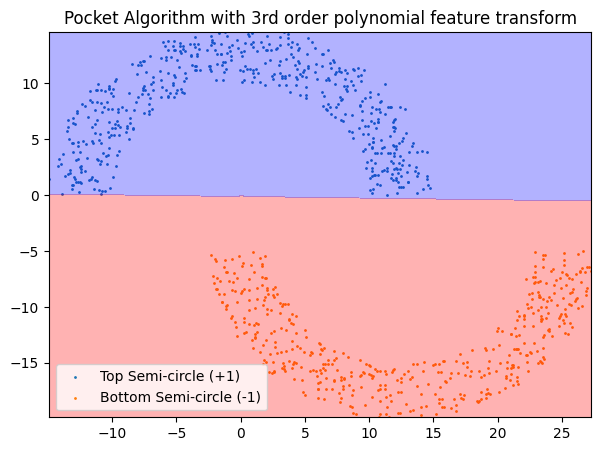

In [268]:
def plot_data_and_boundary(data, labels, w, title):
    plt.figure(figsize=(7, 5))

    # Plot data
    plt.scatter(data[labels == 1, 1], data[labels == 1, 2], s=1, label='Top Semi-circle (+1)')
    plt.scatter(data[labels == -1, 1], data[labels == -1, 2], s=1, label='Bottom Semi-circle (-1)')

    # Define a grid for plotting decision boundary
    x_range = np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
    y_range = np.linspace(data[:, 2].min(), data[:, 2].max(), 100)
    xx, yy = np.meshgrid(x_range, y_range)

    # Flatten and stack to obtain a list of coordinates in the grid
    grid = np.column_stack((xx.flatten(), yy.flatten()))

    # Transform and predict using the 3rd order polynomial feature transform
    transformed_grid = polynomial_transform_3rd_order(np.hstack((np.ones((grid.shape[0], 1)), grid)))
    predictions = np.dot(transformed_grid, w)

    # Plot decision boundary
    contour = plt.contourf(xx, yy, predictions.reshape(xx.shape), levels=[-np.inf, 0, np.inf], colors=['red', 'blue'], alpha=0.3)

    plt.title(title)
    plt.legend()
    plt.show()

plot_data_and_boundary(transformed_data, labels, w_pocket_transformed, "Pocket Algorithm ")

In [271]:
# Linear Regression with 3rd order polynomial feature transform
start_time = time.time()
w_linreg_transformed = linear_regression(transformed_data, labels)
linreg_time_transformed = time.time() - start_time
linreg_error_transformed = compute_error(w_linreg_transformed, transformed_data, labels)

# Pocket Algorithm with 3rd order polynomial feature transform
start_time = time.time()
w_pocket_transformed, _ = pocket_algorithm(transformed_data, labels, w_transform, max_iterations=100000)
pocket_time_transformed = time.time() - start_time
pocket_error_transformed = compute_error(w_pocket_transformed, transformed_data, labels)

# 4. Results
print(f"Linear Regression with 3rd order polynomial feature transform: Time taken = {linreg_time_transformed:.5f} seconds, E_in = {linreg_error_transformed:.5f}")
print(f"Pocket Algorithm with 3rd order polynomial feature transform: Time taken = {pocket_time_transformed:.5f} seconds, E_in = {pocket_error_transformed:.5f}")

print("\nUsing a 3rd order polynomial feature transform can capture more complex relationships in the data. However, it also introduces the risk of overfitting, especially with a limited number of data points.")


Linear Regression with 3rd order polynomial feature transform: Time taken = 0.00573 seconds, E_in = 0.00000
Pocket Algorithm with 3rd order polynomial feature transform: Time taken = 4.33223 seconds, E_in = 0.00000

Using a 3rd order polynomial feature transform can capture more complex relationships in the data. However, it also introduces the risk of overfitting, especially with a limited number of data points.
